## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принИмающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np
z = np.array([9, 7, 4, 5])

m = len(z) - 1
a = np.outer(z, np.ones(m)).astype(int)
b = np.ones((m + 1, 1)).astype(int)

s = np.append(b, a, axis=1)
np.cumprod(s, axis = 1)

array([[  1,   9,  81, 729],
       [  1,   7,  49, 343],
       [  1,   4,  16,  64],
       [  1,   5,  25, 125]])

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

### Пункт 1

In [127]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

In [ ]:
n = int(input('Number of races: '))

#### Трехмерная матрица

In [201]:
winnie = random.exponential(scale=1, size=(10 ** 4, 1, n))
hog = random.normal(1, 1, size=(10 ** 4, 1, n))
rabbit = random.poisson(lam = 1, size=(10 ** 4, 1, n))
jackass = random.binomial(1, 0.5, size=(10 ** 4, 1, n)) * 2
arr = np.concatenate((winnie, hog, rabbit, jackass),axis=1)
arr

Number of races: 4


array([[[ 0.10900438,  0.17930653,  1.68193029,  0.2985944 ],
        [ 2.52006263,  1.03963843,  1.93631479,  0.30459797],
        [ 0.        ,  2.        ,  0.        ,  2.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.4117575 ,  2.23516392,  0.68036802,  0.30061286],
        [ 1.64909753,  1.16916162,  0.50636385,  1.79003401],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  2.        ,  2.        ,  0.        ]],

       [[ 0.90918116,  0.5069319 ,  1.65502208,  0.29902189],
        [ 1.90421575,  1.47071875,  1.92002226,  0.8619511 ],
        [ 2.        ,  2.        ,  0.        ,  1.        ],
        [ 0.        ,  2.        ,  0.        ,  0.        ]],

       ...,

       [[ 1.08244249,  1.97720734,  0.10558048,  0.28224183],
        [ 1.16056985,  1.28235226,  0.60442801,  0.16780253],
        [ 2.        ,  0.        ,  1.        ,  0.        ],
        [ 2.        ,  0.        ,  0.        ,  0.

In [202]:
arrsum = arr.sum(axis = 2)
arrsum

array([[2.2688356 , 5.80061382, 4.        , 0.        ],
       [3.62790231, 5.11465701, 0.        , 4.        ],
       [3.37015703, 6.15690787, 5.        , 2.        ],
       ...,
       [3.44747214, 3.21515265, 3.        , 2.        ],
       [4.23882527, 2.96241808, 5.        , 2.        ],
       [1.47532691, 0.56024301, 8.        , 4.        ]])

#### Победитель в каждом из $10^4$ марафонов

In [203]:
result = arrsum.argmax(axis = 1)
result

array([1, 1, 1, ..., 0, 2, 2])

#### Столбчатая диаграмма, на которой видно кто и сколько раз побеждал в марафоне

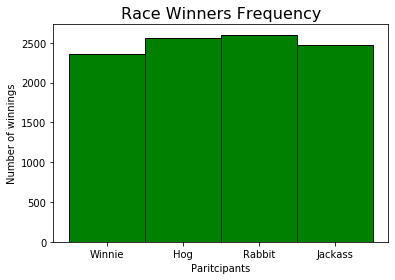

In [204]:
a = ['Winnie', 'Hog', 'Rabbit', 'Jackass']
ypos = np.arange(len(a))
plt.hist(result, rwidth=1, histtype='bar', color='green', alpha=1, edgecolor='black', bins=np.arange(0,np.max(result)+2)-0.5);
plt.xlabel('Paritcipants', fontsize=10);
plt.xticks(ypos, a);
plt.ylabel('Number of winnings', fontsize=10);
plt.title('Race Winners Frequency', fontsize=16);

#### Вывод: На основе данных, можно сделать вывод, что каждый из игроков равновероятно побеждает в марафоне

### Пункт 2

### Winniehog's team

In [289]:
winnie = random.exponential(scale=1, size=(10 ** 4, 1, n))
hog = random.normal(1, 1, size=(10 ** 4, 1, n))
winniehog = np.concatenate((winnie, hog),axis=1)
winniehog

array([[[ 0.14106118,  2.79339487,  0.12173919,  0.0147933 ],
        [ 0.61594219,  2.04312837,  2.18483994,  0.46194524]],

       [[ 0.14300536,  0.02547355,  0.02187009,  0.0197329 ],
        [ 1.39302596, -0.63292476,  0.93392787,  1.38781632]],

       [[ 0.56697213,  0.72904612,  1.33290329,  2.41526341],
        [ 0.63144348,  2.13188661,  1.17432843,  0.51656424]],

       ...,

       [[ 1.604507  ,  0.10002139,  0.90779369,  0.20468209],
        [ 1.70370451,  1.39707243,  1.11364884,  1.04857561]],

       [[ 0.09603059,  1.23193903,  0.1878015 ,  0.44521514],
        [ 1.79245906,  0.86576605, -0.48198512,  0.72464528]],

       [[ 0.70075855,  0.18687669,  0.29613611,  0.57432377],
        [ 2.91445992,  1.46891569,  1.01557451,  2.30994207]]])

In [290]:
winniehogsum = winniehog.sum(axis = 1)
winniehogsum

array([[ 0.75700338,  4.83652324,  2.30657913,  0.47673854],
       [ 1.53603132, -0.60745121,  0.95579795,  1.40754922],
       [ 1.19841561,  2.86093274,  2.50723172,  2.93182764],
       ...,
       [ 3.30821152,  1.49709381,  2.02144252,  1.2532577 ],
       [ 1.88848965,  2.09770508, -0.29418362,  1.16986042],
       [ 3.61521848,  1.65579238,  1.31171062,  2.88426584]])

### Jackaassrabbit's team

In [291]:
rabbit = random.poisson(lam = 1, size=(10 ** 4, 1, n))
jackass = random.binomial(1, 0.5, size=(10 ** 4, 1, n)) * 2
jackassrabbit = np.concatenate((rabbit, jackass),axis=1)
jackassrabbitsum = jackassrabbit.sum(axis = 1)
jackassrabbitsum

array([[0, 3, 0, 2],
       [3, 0, 1, 2],
       [0, 1, 0, 2],
       ...,
       [0, 0, 1, 1],
       [4, 2, 1, 4],
       [1, 2, 2, 2]])

### Comparing teams

In [292]:
teams = np.stack((winniehogsum, jackassrabbitsum), axis = 1)
teams

array([[[ 0.75700338,  4.83652324,  2.30657913,  0.47673854],
        [ 0.        ,  3.        ,  0.        ,  2.        ]],

       [[ 1.53603132, -0.60745121,  0.95579795,  1.40754922],
        [ 3.        ,  0.        ,  1.        ,  2.        ]],

       [[ 1.19841561,  2.86093274,  2.50723172,  2.93182764],
        [ 0.        ,  1.        ,  0.        ,  2.        ]],

       ...,

       [[ 3.30821152,  1.49709381,  2.02144252,  1.2532577 ],
        [ 0.        ,  0.        ,  1.        ,  1.        ]],

       [[ 1.88848965,  2.09770508, -0.29418362,  1.16986042],
        [ 4.        ,  2.        ,  1.        ,  4.        ]],

       [[ 3.61521848,  1.65579238,  1.31171062,  2.88426584],
        [ 1.        ,  2.        ,  2.        ,  2.        ]]])

In [293]:
teamssum = teams.sum(axis = 2)
teamssum

array([[ 8.37684428,  5.        ],
       [ 3.29192728,  6.        ],
       [ 9.49840772,  3.        ],
       ...,
       [ 8.08000555,  2.        ],
       [ 4.86187153, 11.        ],
       [ 9.46698732,  7.        ]])

In [294]:
teamsresult = teamssum.argmax(axis = 1)
teamsresult

array([0, 1, 0, ..., 0, 1, 0])

### Histogram for teams

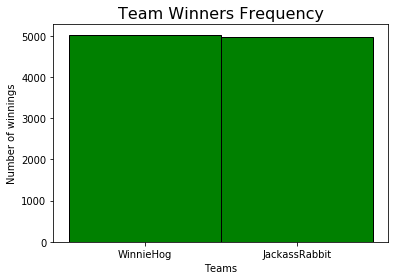

In [295]:
a = ['WinnieHog', 'JackassRabbit']
ypos = np.arange(len(a))
plt.hist(teamsresult, rwidth=1, histtype='bar', color='green', alpha=1, edgecolor='black', bins=np.arange(0,np.max(teamsresult)+2)-0.5);
plt.xlabel('Teams', fontsize=10);
plt.xticks(ypos, a);
plt.ylabel('Number of winnings', fontsize=10);
plt.title('Team Winners Frequency', fontsize=16);

#### Достаточно логичны, если каждый по отдельности выигрывает марафон равновероятно, то и команды скорее всего выиграют равновероятно

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [288]:
def parse_page(search, page):
    import time
    import csv
    from selenium import webdriver
    from selenium.webdriver.chrome.options import Options

    while True:
        try:
            with open('avito_data.csv', 'w') as new_file:
                # csv
                fieldnames = ['Search key', 'Page', 'Price, RUB', 'Subway nearby']

                csv_writer = csv.DictWriter(new_file, fieldnames=fieldnames, delimiter=',')

                csv_writer.writeheader()


                # prepare for parsing
                chrome_options = Options()
                chrome_options.add_argument("--headless")  # we will not open selenium browser just not to slow your pc =D
                website = 'https://www.avito.ru/moskva?q=' + str(search) + '&p=' + str(page)
                driver = webdriver.Chrome('/usr/local/Caskroom/chromedriver/81.0.4044.69/chromedriver',
                                          options=chrome_options)
                driver.implicitly_wait(10)
                driver.get(website)

                # shit to find
                name = "h3[class='snippet-title']"
                url = "a[class='snippet-link']"
                price = "span[data-marker='item-price']"
                address = "div[class='item-address']"

                # itemlines
                try:
                    driver.find_element_by_css_selector("div[class='item__line']")  # check if selector exists
                    itemlines = driver.find_elements_by_css_selector("div[class='item__line']")
                    # code to execute
                    for el in itemlines:
                        try:
                            el.find_element_by_css_selector(address)
                            new_file.write(str(el.find_element_by_css_selector(name).text).replace(',', '') + ',' +
                                           el.find_element_by_css_selector(url).get_attribute('href') + ',' +
                                           el.find_element_by_css_selector(price).text + ',' +
                                           str(el.find_element_by_css_selector(address).text).replace(',', '.'))
                            new_file.write('\n')
                        except:
                            new_file.write(str(el.find_element_by_css_selector(name).text).replace(',', '') + ',' +
                                           el.find_element_by_css_selector(url).get_attribute('href') + ',' +
                                           el.find_element_by_css_selector(price).text + ',' +
                                           'None')
                            new_file.write('\n')
                    print('Data saved to CSV | avito_data.csv')
                except:
                    print('There are no items due to your request')
                # global quit and log
                print('Browser closed')
                driver.quit()
                break
        except Exception as e:
            driver.save_screenshot("screenshot.png")
            driver.quit()
            print('Errot type: ' + str(e))
            print('Trying again...')
            pass

df = parse_page('macbook', 1)

Data saved to CSV | avito_data.csv
Browser closed


btw while True: try...except в коде позволяет если упала страница(например сервер упал) или что-то случилось автоматически перезапустить код, да и вообще в коде много try..except в лучших традицих парсинга

Я так понял надо еще и разделить метро и расстояние :). Элементы в веб странице, которые отвечают за "Расстояние" и "Метро" выглядят как очень неусточийвые "item-address-georeferences-item__content", поэтому не хочу их использовать, потому что если авито изменит элемент, то скрипт не будет работать. Неустойчивость всегда плохо. 
Лучше поработаю с таблицей.

btw первел еще все значения расстояния в метры и убрал знак рубля, потому что единственный и официальной валютой средством платежа в России является российский рубль

In [289]:
import pandas as pd 
   
# reading csv file 
data = pd.read_csv("avito_data.csv") 
data.dropna(inplace = True) 
new = data["Subway nearby"].str.split(".", n = 1, expand = True) 
data["Subway name"]= new[0] 
data["Subway dist, m"]= new[1] 
data.drop(columns =["Subway nearby"], inplace = True)
data['Price, RUB'] = data['Price, RUB'].str.replace("₽", "")
for i in data['Subway dist, m']:
    if type(i) == str:
        if 'км' in i:
            data['Subway dist, m'] = data['Subway dist, m'].str.replace(i, str(int(float(i.replace('км', '')) * 1000)))
data['Subway dist, m'] = data['Subway dist, m'].str.replace("м", "")
data['Price, RUB'] = data['Price, RUB'].str.replace(' ', '')
data.head()

,Search key,Page,"Price, RUB",Subway name,"Subway dist, m"
0,MacBook Pro 13’’ touch pad,https://www.avito.ru/moskva/noutbuki/macbook_p...,85000,Речной вокзал,700
1,MacBook AIR/PRO,https://www.avito.ru/moskva/noutbuki/macbook_a...,13900,Павелецкая,300
2,MacBook Pro 15 2018 256Gb TouchBar SpaceGray,https://www.avito.ru/moskva/noutbuki/macbook_p...,114000,Октябрьское поле,None
3,Macbook Pro Retina 13 2015,https://www.avito.ru/moskva/noutbuki/macbook_p...,48500,ВДНХ,100
4,MAC toledo palette / мак новая палетка теней,https://www.avito.ru/moskva/krasota_i_zdorove/...,1500,Киевская,100


Сохраним все в csv файл

In [290]:
data.to_csv('avito_data.csv')

## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

### Пункт 1

In [186]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Первые 5 наблюдений

In [187]:
df = pd.read_csv('walmart.csv')

In [207]:
df.head() 

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106


Последние 5 наблюдений

In [99]:
df.tail() 

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
418238,45,2012-10-19,98,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


Количество наблюдений

In [100]:
len(df.index)

418239

Количество переменных

In [103]:
df.shape[1]

16

Тип переменных

In [52]:
df.dtypes

Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

Приведение даты к нормальному виду

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

Проверим, все ли ок. Должно быть "datetime64[ns]".

In [56]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Dept                     int64
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

Все ок. Можно приступать ко второму пункту

### Пункт 2

Пропущенные значения в каждой переменной

In [211]:
df.isna().sum() / len(df)

Store           0.000000
Date            0.000000
Dept            0.000000
Weekly_Sales    0.000000
IsHoliday       0.000000
Type            0.000000
Size            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.647369
MarkDown2       0.741430
MarkDown3       0.678251
MarkDown4       0.683638
MarkDown5       0.645700
CPI             0.000000
Unemployment    0.000000
dtype: float64

Удалим те, у которых более 60%

In [216]:
df = df.drop(columns=df.columns[(df.isna().sum() / len(df) > 0.6)],axis=1)

Проверим, что все удалилось

In [217]:
df.isna().sum() / len(df)

Store           0.0
Date            0.0
Dept            0.0
Weekly_Sales    0.0
IsHoliday       0.0
Type            0.0
Size            0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

### Пункт 3

Посчитаем количество магазинов

In [110]:
df['Store'].nunique()

45

Посчитаем количество отделов

In [111]:
df['Dept'].nunique()

81

Посчитаем период времени

In [112]:
pd.to_datetime(max(df['Date'])) - pd.to_datetime(min(df['Date']))

Timedelta('987 days 00:00:00')

Выходит ровно 987 дней

### Пункт 4

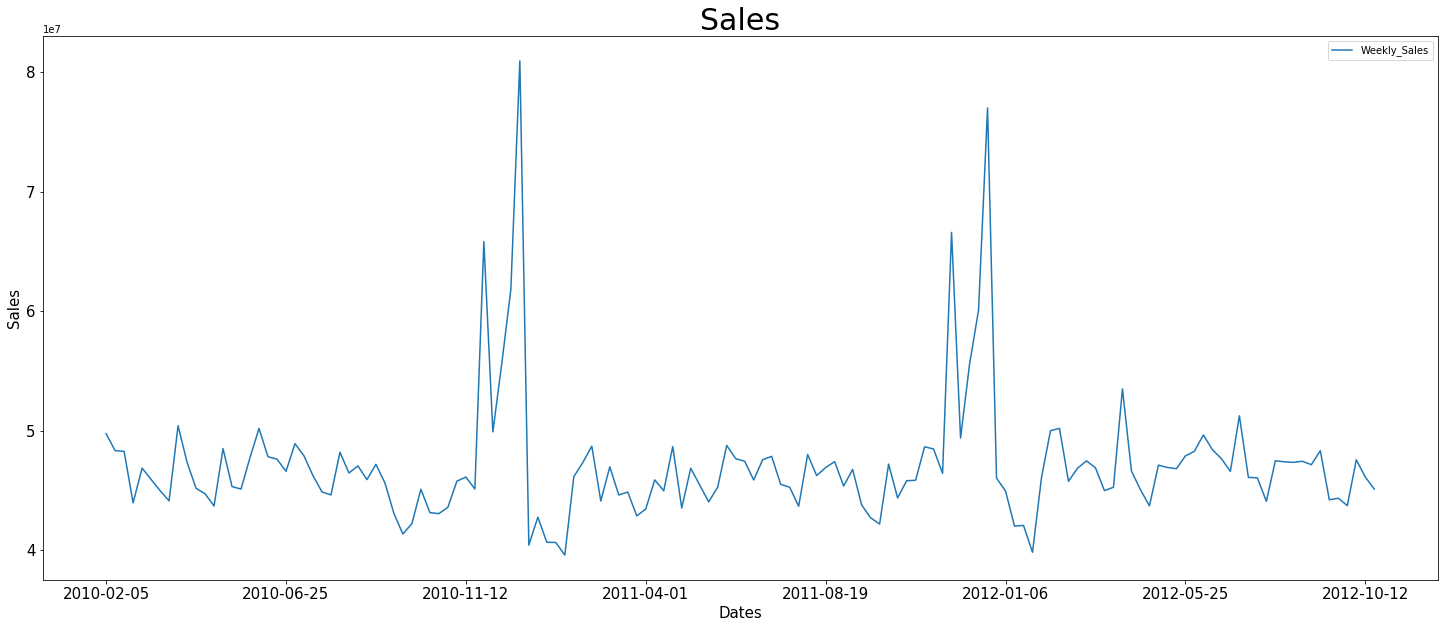

In [193]:
ax = df[['Weekly_Sales', 'Date']].groupby('Date').sum().plot(figsize=(25,10), fontsize=15)
ax.set_title('Sales',fontsize= 30)
ax.set_xlabel("Dates", fontsize= 15)
ax.set_ylabel("Sales", fontsize= 15);

Как и ожидалось - наибольшее число покупок совершаются перед рождеством. p.s. формат даты yyyy-mm-dd, так как wallmart американская сеть и логично предположить что данные в реальной жизни придется адаптировать под особенности страны, поэтому я не стал изменять на dd-mm-yyyy, что является  форматом в Европе и в России.

### Пункт 5

Для начала дропну некоторы категориальные и бинарные признаки

In [123]:
df.drop(['Store', 'Dept', 'IsHoliday'], axis=1)

,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106
1,2010-02-12,46039.49,A,151315,38.51,2.548,211.242170,8.106
2,2010-02-19,41595.55,A,151315,39.93,2.514,211.289143,8.106
3,2010-02-26,19403.54,A,151315,46.63,2.561,211.319643,8.106
4,2010-03-05,21827.90,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
418234,2012-09-21,467.30,B,118221,65.32,4.038,191.856704,8.684
418235,2012-09-28,508.37,B,118221,64.88,3.997,192.013558,8.684
418236,2012-10-05,628.10,B,118221,64.89,3.985,192.170412,8.667
418237,2012-10-12,1061.02,B,118221,54.47,4.000,192.327265,8.667


Воспользуемся seaborn для решения этой задачи

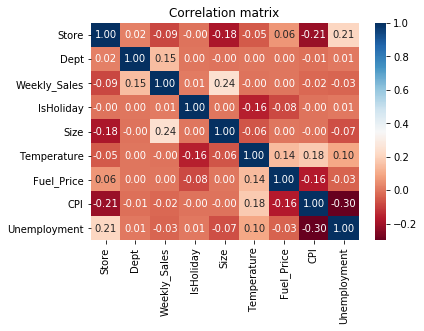

In [220]:
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu').set_title('Сorrelation matrix');

### Пункт 6

In [178]:
import plotly_express as px
import matplotlib.pyplot as plt

Сгрупирую и проссумирую по Store и посортирую по Weekly_Sales

In [205]:
df.groupby(['Store']).sum().sort_values(by=['Weekly_Sales'], ascending=False).head()

,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,,
20,446829,2.993660e+08,723.0,2065128912,560723.35,34616.513,2.118369e+06,74717.345
4,453767,2.973940e+08,727.0,2098567422,633722.02,32764.265,1.311579e+06,60970.545
14,438511,2.872952e+08,701.0,2001546774,575782.53,34016.298,1.855545e+06,86170.930
13,463765,2.844811e+08,738.0,2282970690,557680.60,34107.434,1.337375e+06,72921.892
2,451852,2.735476e+08,722.0,2055439120,691853.55,32693.814,2.190477e+06,77559.623


Перейду к графику

In [376]:
task6df = df.groupby(['Store'], as_index=False).sum().sort_values(by=['Weekly_Sales'], ascending=False).head()

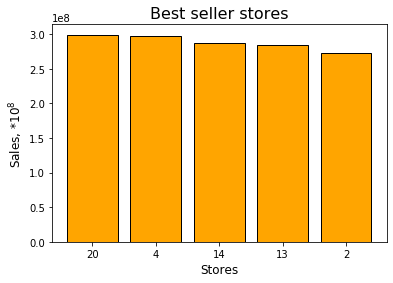

In [380]:
height = task6df['Weekly_Sales']
bars = task6df['Store']
y_pos = [i for i in range(5)]
plt.bar(y_pos, height, color='orange', edgecolor='black')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Best seller stores', fontsize=16)
plt.xlabel('Stores', fontsize=12)
plt.ylabel('Sales, $*10^8$', fontsize=12)
# Show graphic
plt.show()


### Пункт 7

Новый DF в котором только департаменты типа А

In [224]:
newdf = df.groupby('Type').get_group('A')
newdf

,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...
387983,41,2012-09-07,99,20.12,True,A,196321,67.41,3.596,198.095048,6.432
387984,41,2012-09-14,99,0.10,False,A,196321,59.39,3.659,198.126718,6.432
387985,41,2012-09-21,99,0.08,False,A,196321,59.81,3.765,198.358523,6.432
387986,41,2012-10-05,99,934.88,False,A,196321,50.14,3.779,198.822132,6.195


Выделим групы департаментов и отсортируем по Weekly_Sales

In [232]:
newdf.groupby(['Dept']).sum().sort_values(by=['Weekly_Sales'], ascending=False).head(n=10)

,Store,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment
Dept,,,,,,,,
92,69438,3.503512e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
95,69438,3.034455e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
90,69438,2.203874e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
38,69438,2.031445e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
72,60165,1.774588e+08,201.0,543016250,170806.55,9530.754,499039.165949,22189.284
91,69438,1.679659e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
40,69438,1.675846e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
2,69438,1.624953e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315
94,69438,1.595790e+08,220.0,553721900,190644.62,10439.512,544961.156541,24406.315


Перейду к графику

In [343]:
df_depts = newdf.groupby(['Dept'], as_index=False).sum().sort_values(by=['Weekly_Sales'], ascending=False).head(n=10)

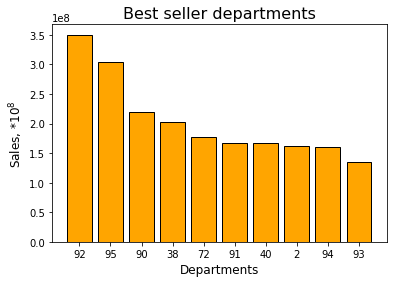

In [382]:
import matplotlib.pyplot as plt
height = df_depts['Weekly_Sales']
bars = df_depts['Dept']
y_pos = [i for i in range(10)]
plt.bar(y_pos, height, color='orange', edgecolor='black')
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Best seller departments', fontsize=16)
plt.xlabel('Departments', fontsize=12)
plt.ylabel('Sales, $*10^8$', fontsize=12)
# Show graphic
plt.show()


## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

### Решение пунктов 1, 2 и 3

Прежде чем запустить скрипт, посмотрите гистограмму снизу. Потому иначе у вас будет fake credentials и/или captcha needed и вам придется вводить свои данные от вк :):):):). BTW, приятная таблица находится в пункте 4 в pd dataframe

All data saved to csv | vk_data.csv


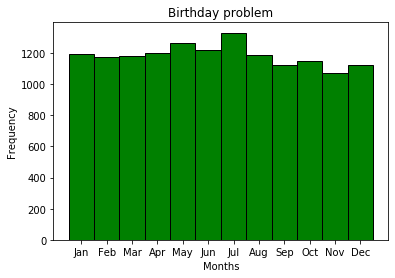

In [268]:
import vk_api
import random
import csv
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

import pandas as pd
# csv first
with open('vk_data.csv', 'w') as new_file:
                # csv
                fieldnames = ['id', 'bdate', 'bmonth', 'byear', 'dandm']

                csv_writer = csv.DictWriter(new_file, fieldnames=fieldnames, delimiter=',')

                csv_writer.writeheader()

                newDict = dict()
                # parsing
                vk_session = vk_api.VkApi('username', 'password')
                vk_session.auth()

                vk = vk_session.get_api()
                
                vk_group = vk.groups.getMembers(group_id = 'mudakoff', fields = 'bdate')
                
                
                for i in range(0, 20):
                    vk_group = vk.groups.getMembers(group_id = 'mudakoff', offset = 1000 * i,  fields = 'bdate')
                    for k in range(0, 1000):
                        try:
                            new_file.write(str(vk_group['items'][k]["id"]) + ',' + str(vk_group['items'][k]["bdate"]).replace('.', ','))
                            new_file.write('\n')
                        except:
                            pass
                
                print('All data saved to csv | vk_data.csv')
                
                # task 3
                my_csv = pd.read_csv('vk_data.csv')
                column = my_csv.bmonth
                a = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                ypos = np.arange(len(a))
                # histogram
                plt.hist(my_csv.bmonth, rwidth=2, histtype='bar', color='green', alpha=1, edgecolor='black', bins=np.arange(1,np.max(my_csv.bmonth)+2)-0.5)
                plt.xlabel('Months')
                plt.xticks(ypos + 1, a)
                plt.ylabel('Frequency')
                plt.title('Birthday problem')

Ответ на вопрос про равновероятность: Дни рождения по месяцам не являются равновероятнотными событиями, что в целом дотстаточно логично - это всего лишь предпосылка для решения проблемы дней рождений. Очевидно, что будут наблюдаться различные сезонные являения, для различных локаций. Почему-то июль наиболее популярный месяц для дня рождения подписчиков МДК.

### Пункт 4

Его делаю отдельно не просто так. За большое количество запросов ВК может начать выдавать Каптчу из-за чего выполнение скрипта будет невозможно.

In [269]:
import random
import csv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import pandas as pd

In [277]:
counter = 0
# csv via pandas
df = pd.read_csv('vk_data.csv')
# firstly i made head with date and month('dandm'), now let's put data to this column
df["dandm"] = df['bdate'].astype(str) + ',' + df['bmonth'].astype(str)
df = df.drop(['byear'], axis=1)
df.head()

,id,bdate,bmonth,dandm
0,177,23,4,"23,4"
1,345,19,10,"19,10"
2,1080,4,7,"4,7"
3,1232,16,6,"16,6"
4,1295,6,6,"6,6"


In [278]:
df.tail()

,id,bdate,bmonth,dandm
14584,733361,24,11,"24,11"
14585,733595,25,1,"25,1"
14586,733653,18,5,"18,5"
14587,733732,6,8,"6,8"
14588,733733,21,12,"21,12"


In [281]:
df.to_csv('vk_data.csv')

Проверим парадокс

In [279]:
# choose 50 rows with dandm data
fifty = df["dandm"].sample(n = 50)
for i in range(0, 1000):
    fifty = df["dandm"].sample(n = 50)
    for j in fifty.duplicated():
        if j == True:
            counter = counter + 1
            break
print('Вероятность:', counter / 1000)

Вероятность: 0.972


Вероятность совпадает с той, которая в парадоксе дне рождений. (В районе $97%$)